<a href="https://colab.research.google.com/github/RajarajachozhanVK/RajarajachozhanVK/blob/main/Python_Data_Visualizations_Libraries_for_NLP_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aim: Python Data Visualizations Libraries for NLP
Procedure:
In the realm of Natural Language Processing (NLP), visualization plays a crucial role in
understanding and interpreting the vast amount of data processed and generated.

 Python, being a
leading programming language in data science, offers a plethora of libraries for visualizing NLP
data. These libraries help in showcasing the relationships between words, the importance of
different terms in the dataset, sentiment analysis, and much more.
Let's implement a few basic examples to showcase how some of the Python libraries mentioned
can be used for NLP visualizations.

To focus on creating a word cloud, visualizing word
frequencies, and generating simple topic model visualization. This will give you a practical sense
of how to start with NLP data visualizations.

Prerequisites
Make sure you have the necessary libraries installed. You can install them using pip.

In [ ]:
pip install matplotlib wordcloud nltk gensim pyldavis seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 12.2 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


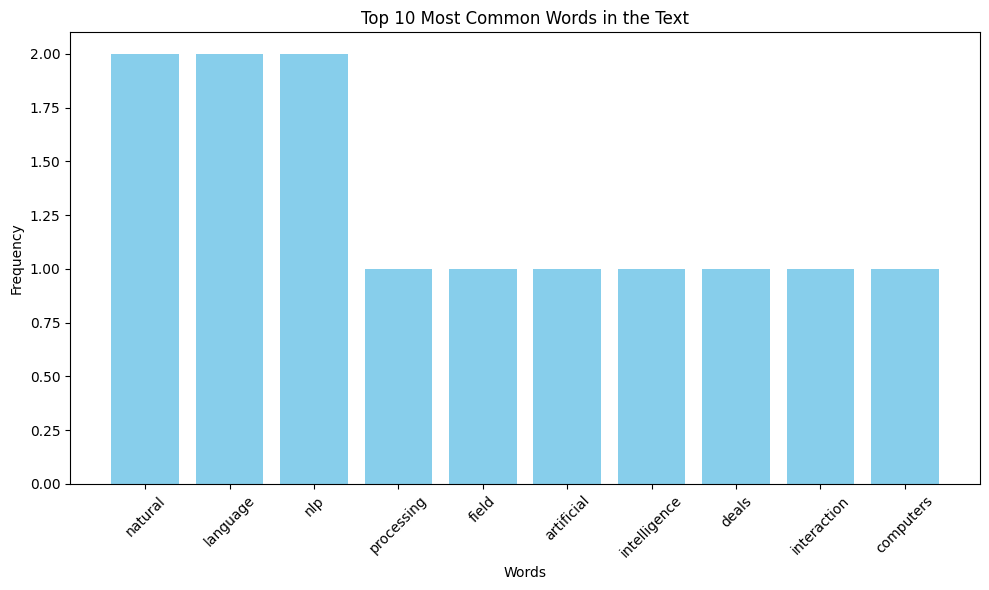

In [5]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import pandas as pd
nltk.download('punkt')
nltk.download('stopwords')
# Sample text for analysis
text = "Natural language processing (NLP) is a field of artificial intelligence that deals with the interaction between computers and humans using natural language. Python has become one of the primary languages for NLP due to its simplicity and powerful libraries like NLTK, spaCy, and Gensim."
# Tokenize the text
tokens = word_tokenize(text.lower())
# Filter out stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
# Calculate word frequencies
word_freq = nltk.FreqDist(filtered_tokens)
# Select top N words
top_words = word_freq.most_common(10)
# Convert to DataFrame for easier plotting
word_freq_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])
# Plotting with Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(word_freq_df['Word'], word_freq_df['Frequency'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in the Text')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

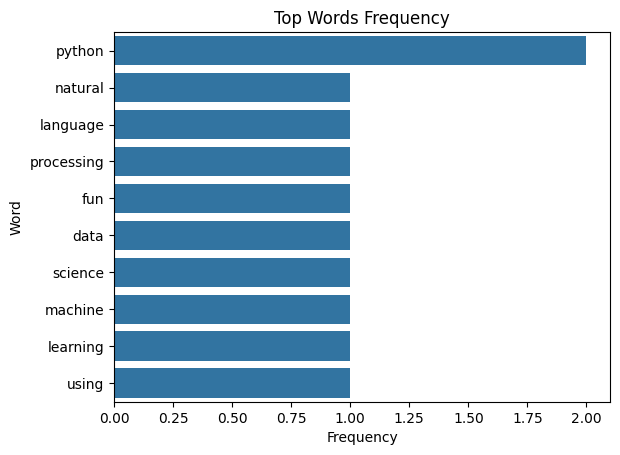

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt
# Sample text
text = "Natural language processing with Python is fun. Data science and machine learning using Python have gained immense popularity."
# Tokenization and cleaning
words = word_tokenize(text.lower())
filtered_words = [word for word in words if word.isalnum() and word not in stopwords.words('english')]
# Frequency distribution
word_freq = nltk.FreqDist(filtered_words)
# Convert to Pandas DataFrame for easier plotting
freq_df = pd.DataFrame(list(word_freq.items()), columns=["Word", "Frequency"]).sort_values(by="Frequency", ascending=False)
# Plotting with Seaborn
sns.barplot(x='Frequency', y='Word', data=freq_df.head(10))
plt.title('Top Words Frequency')
plt.show()


In [7]:
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import pyLDAvis.gensim_models
import nltk
# Preparing a sample dataset
documents = [
 "Python and R are popular for data science.",
 "Python and Java are widely used in software development.",
 "Machine learning involves neural networks.",
 "Data science is an exciting field.",
 "Neural networks are key for many machine learning applications."
]
# Tokenization and stop words removal
stop_words = set(nltk.corpus.stopwords.words('english'))
texts = [[word for word in document.lower().split() if word not in stop_words] for document in documents]
# Creating a dictionary and corpus for LDA
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
# Training the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=2, random_state=100, update_every=1, passes=10, alpha='auto')
# Visualizing the topics using pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)